<a href="https://colab.research.google.com/github/tdushio/shiolabOpen/blob/master/33a_%E7%8A%B6%E6%85%8B%E3%83%95%E3%82%A3%E3%83%BC%E3%83%89%E3%83%90%E3%83%83%E3%82%AF%2B%E3%82%AA%E3%83%96%E3%82%B6%E3%83%BC%E3%83%90%E3%81%AB%E3%82%88%E3%82%8B%E5%88%B6%E5%BE%A1%E7%B3%BB(LQR%2BLQE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 33a.状態フィードバック+オブザーバによる制御系(LQR+LQE)

31.LQRによる状態フィードバック制御系と32.LQEによるオブザーバの設計を併合して、出力フィードバック型の制御系を構成する方法を紹介する。

## 状態フィードバック＋オブザーバ併合系
32.では、制御対象が不安定であっても、可制御条件を満たせば、状態変数にフィードバックゲインをかけて入力信号に帰還させる、いわゆる状態フィードバックによって安定化できることを示した。 しかし、現実の制御対象においてはすべての状態量がセンサを使って計測できるわけではない。 これに対して、33.では制御対象が可観測条件を満たせば、入手可能な入出力信号を使って直接計測できない内部の状態変数の値をリアルタイムに推定するオブザーバを設計することができることを示した。

この２つのアイデアを合体して、測定できない状態量の代わりに推定された状態量を使って疑似的な状態フィードバック制御系を構成することが考えらえる。 線形システム理論はこのアイデアが成功することを保証している。 このことは観測と制御の分離定理と呼ばれているが、状態フィードバックによる振る舞いとオブザーバによる状態推定の振る舞いは互いに干渉せず、漸近的に独立していることがわかっている。 ここでは、Pythonを使ってこの事実を確認する。

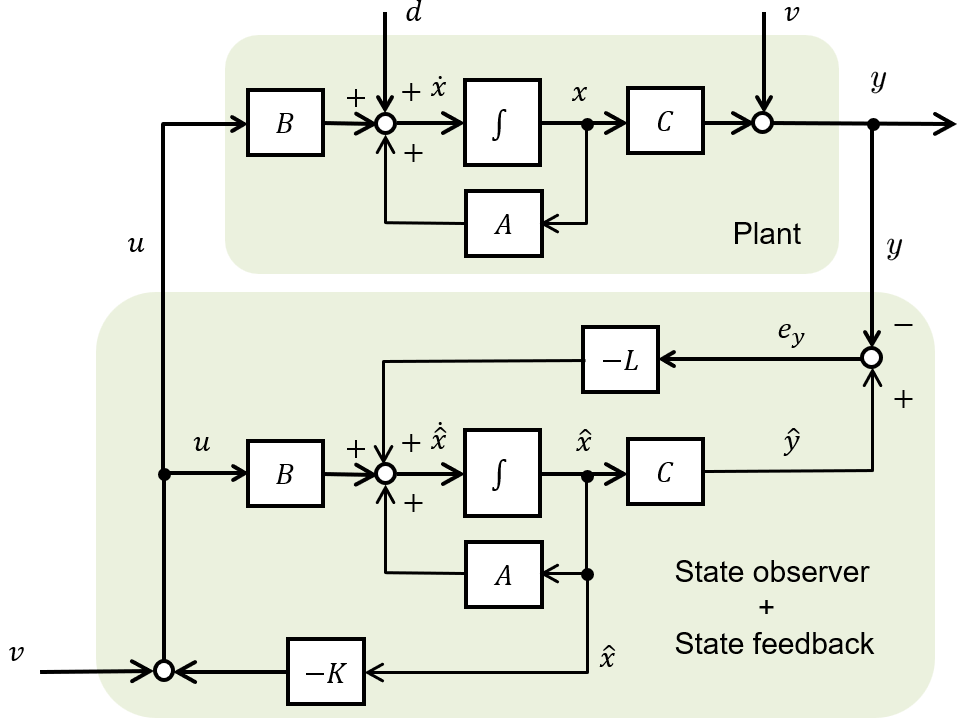

## 制御対象のモデル
倒立振子のモデルを
$1$ 入力$2$出力$4$次の線形時不変システム(LTI)で与える。<br>
\begin{equation}
   \dot{x}(t) = A x(t) + B u(t)+Gw(t) , \; x(0)=x_0 \\
    y(t) = C x(t)+Du(t)+v(t),\;\;   \nonumber
\end{equation}
各記号の詳細は 32を参照されたい。

## 状態フィードバック則

上記の制御対象は可制御性の条件を満たしているとする。すなわち以下が成り立つ。
\begin{equation}
  M_c = \left[ \begin{array}{c} B, AB, A^2B, A^3B \end{array} \right]
  \in {\mathrm R}^{4\times 4}
\end{equation}
はフルランクであるとする。

そして、適切な設計パラメータ$Q$,$R$を用いて
32のLQRによる制御系設計法にもとづき状態フィードバック則が以下のように求まっているとする。

\begin{equation}
   u(t) = -K x(t) + v(t)
\end{equation}


# 全状態オブザーバの構成

制御対象は以下の可観測行列が列フルランク、すわなわち可観測条件が満たされているとする。
\begin{equation}
  M_o = \left[ \begin{array}{c} C \\ CA \\ CA^2 \\ CA^3 \end{array} \right]
  \in {\mathrm R}^{8\times 4}
\end{equation}

そして、適切な設計パラメータ$Q_N$,$R_N$を用いて
33.のオブザーバの設計手法にもとづき、
オブザーバが以下のように求まっているとする。
\begin{equation}
   \dot{\hat{x}}(t) = (A-KC) \hat{x}(t) + Ly(t) +(B-KD) u(t) \nonumber
\end{equation}

## 状態フィードバック＋オブザーバによる出力フィードバック

上記の状態フィードバック則とオブザーバを併合すると
\begin{equation}
   \dot{\hat{x}}(t) = (A-LC+(B-LD)K) \hat{x}(t) + Ly(t) + (B-LD) v(t) \\
    u(t) = -K \hat{x}(t) + v(t) ,\;\;  \nonumber
\end{equation}


# モジュールのインストール
以下のライブラリを使用する。


*   numpy
*   matplotlib
*   control (制御工学ライブラリ)
*   cvxpy (LMIを求解するためのライブラリ)

### <参考>
<A href="https://python-control.readthedocs.io/en/0.10.0/">制御工学モジュール control のドキュメント</a><br>
<A href="https://numpy.org/doc">numpy のドキュメント</A><br>
<A href="https://matplotlib.org/stable/index.html">matplotlib のドキュメント</A><br>
<A href="https://www.cvxpy.org/">cvxpy のドキュメント</A>

In [ ]:
import numpy as np
# !pip install slycot
!pip install control         # vscode ではターミナルから手動でインストール
from control import matlab   # matlab 互換関数を使用する場合
import matplotlib.pyplot as plt

# プログラム

1.  制御対象のモデル
2.  可観測性の確認
3.  オブザーバゲインの計算
4.  オブザーバの構成
5.  シミュレーション１ 推定誤差の収束確認
6.  シミュレーション２ 観測と制御の分離定理の確認




# 制御対象のモデル
倒立振子のモデルを
$1$ 入力$4$出力$4$次の線形時不変システム(LTI)で与える。<br>
\begin{equation}
   \dot{x}(t) = A x(t) + B u(t) , \; x(0)=x_0  \\
    y(t) = C x(t),\;\; \nonumber
\end{equation}
ここで、$u(t)\in{\mathrm R}$はモータへの入力,
$y(t)\in{\mathrm R}^4$は出力,$x(t)\in{\mathrm R}^4$は状態の時刻$t\in [0,T_f]$での値を成分とする列ベクトルである。<br>
$\dot{x}$は状態$x$の導関数を表す。<br>
$A\in{\mathrm R}^{4\times 4}$,$B\in{\mathrm R}^{4\times 1}$,$C\in{\mathrm R}^{4\times 4}$,$D\in{\mathrm R}^{4\times 1}$は定数行列である.<br>
$x_0\in{\mathrm R}^4$は初期状態を表す。

制御対象に関わる物理量

In [ ]:
l = 0.15             # 振子の長さ
m = 0.0402           # 振子の質量
Jp = 0.00030142      # 振子の慣性モーメント
M = 0.6862           # 台車の質量
Jt = 1.34 * 10**(-4)
Jm = 1.30 * 10**(-7)
Jc = Jt + Jm
r = 0.02485
F = 0.36
c = 0.0015
g = 9.80665
a = 1.9

p = M + m + Jc/(r*r)
q = Jp + m*l*l
W = 1/(p * q - m * m * l * l)


係数行列の作成

In [ ]:
A = np.array([
    [0, 0, 1, 0],
    [0, 0, 0, 1],
    [0, -m*m*g*l*l*W, -F*q*W, c*m*l*W],
    [0, m*g*l*p*W, F*m*l*W, -c*p*W]
    ])
B = np.array([[0, 0, a*q*W, -a*m*l*W]]).T
C = np.array([[1, 0, 0, 0], [0, 1, 0, 0]])
D = np.zeros((2, 1))

G = np.eye(4)
QN = np.diag([1,1,1,1])
RN = np.diag([1,1])

# 今回は使わないが、状態空間の生成は以下
sys = matlab.ss(A, B, C, D)


# 可観測性の確認
可観測性を以下の可観測行列$M_o$のランク条件で確認する


In [ ]:
Mo = C
Mo = np.append(C,Mo@A,axis=0)
Mo = np.append(C,Mo@A,axis=0)
Mo = np.append(C,Mo@A,axis=0)
print(Mo)
rank = np.linalg.matrix_rank(Mo)
print(rank)
if rank==4:
  print('Observable')
else:
  print('Not observable')


## オブザーバゲインを求める

In [ ]:
QN = np.diag([1,1,1,1])
RN = np.diag([1,1])
# L,P,E = matlab.lqe(sys,QN,RN)
L,P,E = matlab.lqe(A,G,C,QN,RN)


# オブザーバを構成する

In [ ]:
Ao = A - L @ C
Bo = np.append(L, B - L @ D, axis=1)
Co = np.eye(4)
Do = np.zeros((4,3))
sys_obs = matlab.ss(Ao, Bo, Co, Do)
matlab.pole(sys_obs)

# シミュレーション
## 閉ループ系の構成
LQR問題にもとづき状態フィードバックゲイン $K$ を求め、
に外生入力$v$を加えた
\begin{equation}
      u(t) = -K x(t) + r
\end{equation}
を施すと、閉ループ系を以下で構成する.
\begin{equation}
   \dot{x}(t) = (A-BK) x(t) + B r(t), \;\;x(0)=x_0  \\
    y(t) = (C-DK)x(t) + D r(t) ,\;\;  \nonumber
\end{equation}

In [ ]:
Q = np.diag(np.array([1,1,1,1]))*0.01
R = np.array([[1]])
K,P,E = matlab.lqr(sys,Q,R)      # matlab.lqr() を使用して状態フィードバックゲインを求める

A_ = A - B @ K
B_ = B
C_ = np.append( C - D @ K, -K, axis=0)
D_ = np.append( D, [[1]], axis=0)

sys_cl = matlab.ss(A_, B_, C_, D_)       # 閉ループ系の状態空間モデル
matlab.pole(sys_cl)


array([-7.99523477+0.j       , -6.33752342+0.j       ,
       -0.38360674+0.2326842j, -0.38360674-0.2326842j])

## 時間応答の観察
matlab.lsim で、システムの応答とオブザーバの応答を計算し描画する

初期値の推定誤差が収束して $0$となる様子が確認できる。

In [ ]:
# 初期値応答
Td = np.arange(0, 10, 0.01)    #シミュレーション時間
# rng = np.random.default_rng()
# print(rng)
# u = rng.random(len(Td))                    #入力
r = np.zeros(len(Td))
r[50:300] = np.ones(250)
r[500:750] = np.ones(250)

x0 = np.array([0.5, np.pi/5, 0,0])
yu, t, x = matlab.lsim(sys_cl, r, Td, x0)
u = (-K @ x.T).T + r

z0 = np.zeros((4,1))
z, t, xe = matlab.lsim(sys_obs, yu, Td)




応答波形を描画する

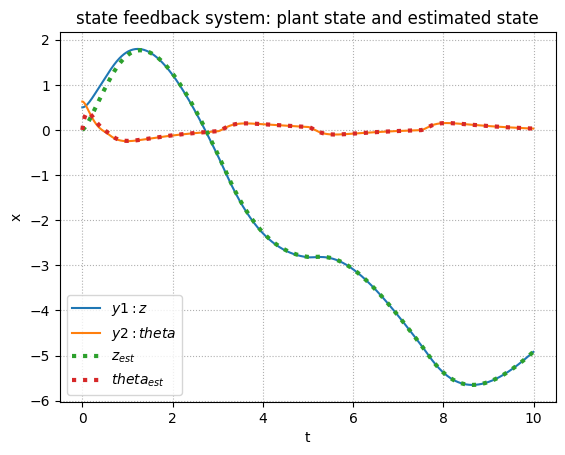

In [ ]:
# 初期値応答の描画
fig, ax = plt.subplots()
ax.plot(t, yu[:, 0], ls = '-', label = '$y1:z$')
ax.plot(t, yu[:, 1], ls = '-', label = '$y2:theta$')
# ax.plot(t, yu[:, 2], ls = ':', label = '$u$')
# ax.plot(t, u[:, 0], ls = ':', label = '$-Kx$')
ax.set_title('state feedback system: plant state and estimated state')

ax.plot(t, z[:, 0], ls = ':', lw = 3.0, label = '$z_{est}$')
ax.plot(t, z[:, 1], ls = ':', lw = 3.0, label = '$theta_{est}$')

ax.set_xlabel('t')
ax.set_ylabel('x')
ax.grid(ls=':')
ax.legend(loc='best')
plt.show()

## 状態フィードバック＋オブザーバによる出力フィードバック
閉ループ系の構成
状態フィードバックの代わりに推定値$z$をフィードバックする。
すなわち、制御入力は
$u(t)=−Kz(t)+r$
となる。
このとき、$y,r$と$z$の間には以下の関係が成り立つ
\begin{equation}
   \dot{z}(t) = (A-LC+(B-LD)K) z(t) + Ly(t) + (B-LD) r(t) \\
    u(t) = -K z(t) + r(t) ,\;\;  \nonumber
\end{equation}


In [ ]:
A_ = A - L@C - (B-L@D)@K
B_ = L
C_ = -K
D_ = [[0,0]]

sys_fbc = matlab.ss(A_, B_, C_, D_)       # 動的出力フィードバック制御器


sys_total = matlab.feedback(sys, sys_fbc, sign=1)

print('pole of state feedback system')
print(matlab.pole(sys_cl))
print('pole of obsereber')
print(matlab.pole(sys_obs))
print('pole of feedback controller')
print(matlab.pole(sys_fbc))
print('pole of total closed system')
print(matlab.pole(sys_total))


状態フィードバック則を変更すると閉ループ系の極は変化するが、オブザーバの極は不変であることがわかる。



In [ ]:
Z44 = np.ma.zeros((4,4))
Z14 = np.ma.zeros((1,4))
Z42 = np.ma.zeros((4,2))
Z41 = np.ma.zeros((4,1))
Aa = np.bmat([[A,Z44],[L@C, A-L@C]])
Ba = np.bmat('B;B')
# Ka = np.bmat('K Z14')
Ka = np.bmat('Z14 K')
Ca = np.matrix([[1,0,0,0,0,0,0,0],
                [0,1,0,0,0,0,0,0],
                [0,0,0,0,1,0,0,0],
                [0,0,0,0,0,1,0,0]])
Cx = np.bmat([Z14, -K])
Ca = np.bmat('Ca;Cx')
Da = np.ma.zeros((5,6))
Ga = np.bmat([[G,Z42],[Z44,-L]])
print(Aa)
print(Ba)
print('Ka')
print(Ka)
print(Ca)
print(Da)
print(Ga)

E,V =  np.linalg.eig(Aa-Ba@Ka)
print('pole of total sysem')
print(E)
E,V =  np.linalg.eig(A-B@K)
print('pole of close loop sysem')
print(E)
E,V =  np.linalg.eig(A-L@C)
print('pole of observer')
print(E)


In [ ]:
sys_all = matlab.ss(Aa-Ba@Ka, Ga, Ca, Da)
PL = matlab.pole(sys_all)
print(PL)


# 初期値応答
Td = np.arange(0, 10, 0.01)    #シミュレーション時間
# rng = np.random.default_rng()
# print(rng)
# u = rng.random(len(Td))                    #入力
r = np.zeros((len(Td),6))
#r[50:300] = np.ones(250)
#r[500:750] = np.ones(250)

x0 = np.array([5, np.pi, 0,0,0,0,0,0])
yu, t, x = matlab.lsim(sys_all, r, Td, x0)
u = (-Ka @ x.T).T

# z0 = np.zeros((4,1))
# z, t, xe = matlab.lsim(sys_all, yu, Td)





In [ ]:
# 初期値応答の描画
fig, ax = plt.subplots()
ax.plot(t, yu[:, 0], ls = '-', label = '$y1:z$')
ax.plot(t, yu[:, 1], ls = '-', label = '$y2:theta$')
# ax.plot(t, yu[:, 2], ls = ':', label = '$u$')
# ax.plot(t, u[:, 0], ls = ':', label = '$-Kx$')
ax.set_title('state feedback system: plant state and estimated state')

ax.plot(t, yu[:, 2], ls = ':', lw = 3.0, label = '$z_{est}$')
ax.plot(t, yu[:, 3], ls = ':', lw = 3.0, label = '$theta_{est}$')
ax.plot(t, yu[:, 4], ls = '-', lw = 2.0, label = '$u$')

ax.set_xlabel('t')
ax.set_ylabel('x')
ax.grid(ls=':')
ax.legend(loc='best')
plt.show()

コントローラの実装イメージ<br>
連続時間系を離散化する

In [ ]:
Ac = A-L@C-B@K
Bc = L
Cc = -K
Dc =[[0,0]]
sys_c = matlab.ss(Ac,Bc,Cc,Dc)
dsys = matlab.c2d(sys_c,0.01)
print(dsys)